# imports and initializations

In [1]:
# add our custom modules to the python import path
import sys
import os
sys.path.append(os.getcwd() + '/../../Client_modules/')
import time

import mResSweepDouble
from socProxy import makeProxy
import h5py
from PythonDrivers.control_atten import setatten
# import PythonDrivers.YOKOGS200 as YOKOGS200
%matplotlib inline
import matplotlib.pyplot as plt
savePath = r'Z:/t1Team/Data/20221014_TAHP02_annealed20min0926/20221011TAHP02Annealed20min_RFSOC/RFSOC_doubleSweep_v2'

# Python 3.7
# os.environ['PATH'] = os.getcwd() + '\\PythonDrivers' + os.pathsep + os.environ['PATH']
# Python 3.8 and newer
os.add_dll_directory(os.getcwd() + '/../../Client_modules/PythonDrivers')

Could not import QickSoc: No module named 'pynq'


<AddedDllDirectory('C:\\Users\\my\\Documents\\GitHub\\ZCU216_Russell\\res_dev\\notebooks\\20221011_TAHP02annealed20min0926/../../Client_modules/PythonDrivers')>

In [2]:
# create proxy to ZCU216 board
soc, soccfg = makeProxy('192.168.1.146')
print(soccfg)

Pyro.NameServer PYRO:Pyro.NameServer@192.168.1.146:8888
myqick PYRO:obj_f2f00fb67e324ff8bccd4f5ad4099dda@192.168.1.146:38931

QICK configuration:

	Board: ZCU216

	Global clocks (MHz): tProcessor 430.080, RF reference 245.760

	7 signal generator channels:
	0:	axis_signal_gen_v4 - tProc output 1, switch ch 0, maxlen 65536
		DAC tile 2, ch 0, 32-bit DDS, fabric=430.080 MHz, fs=6881.280 MHz
	1:	axis_signal_gen_v4 - tProc output 2, switch ch 1, maxlen 65536
		DAC tile 2, ch 1, 32-bit DDS, fabric=430.080 MHz, fs=6881.280 MHz
	2:	axis_signal_gen_v4 - tProc output 3, switch ch 2, maxlen 65536
		DAC tile 2, ch 2, 32-bit DDS, fabric=430.080 MHz, fs=6881.280 MHz
	3:	axis_signal_gen_v4 - tProc output 4, switch ch 3, maxlen 65536
		DAC tile 2, ch 3, 32-bit DDS, fabric=430.080 MHz, fs=6881.280 MHz
	4:	axis_signal_gen_v4 - tProc output 5, switch ch 4, maxlen 65536
		DAC tile 3, ch 0, 32-bit DDS, fabric=430.080 MHz, fs=6881.280 MHz
	5:	axis_signal_gen_v4 - tProc output 6, switch ch 5, maxlen 65536
	

# Define sweep parameters

In [9]:
inputDict = {}
inputDict['LO_f'] = 5e3  # local oscillator frequency

# define frequencies
# inputDict['span_f'] = [0.2,0.03]  # frequency span to sweep over. The same for all resonators
inputDict['span_f'] = [0.6,0.09]  # frequency span to sweep over. The same for all resonators
inputDict['res_f'] = [6.830564e3, 
                      6.261891e3]
# inputDict['res_f'] = [6.83045e3, 
#                       6.2617e3]

# define numbers of points
# inputDict['n_expts'] = 300  # number of points along the frequency axis
inputDict['n_expts'] = 450  # number of points along the frequency axis

# timing. Units are clock cycles, but converted from us
inputDict['ring_up_time'] = 500  # time waiting for the resonator to ring up at the start of each sweep
inputDict['ring_between_time'] = 50  # time waiting for the resonator to ring up at the start of each sweep
inputDict['readout_length'] = 1000  # time to average over
inputDict['adc_trig_offset'] = 0.1  # time after the DAC starts the final steady pulse before the ADC starts it's read

# power
inputDict['basePower'] = -10 # dBm
inputDict['gain'] = [22000, 17000]
inputDict['attenSerial'] = [27712, 27784]

inputDict['readout_lengthList'] = [100, 100, 100, 100, 100, 100, 100]  # time to average over
inputDict['attenList'] =          [ 20,  30,  40,  50,  60,  70,  80]
inputDict['n_roundsList'] =       [  5,  10,  10,  20,  30, 100, 900]  # number of times to sweep along the frequency axis
inputDict['n_repsList'] =         [ 50,  50,  50,  50,  50, 100, 100] # number of repetitions to take at each frequency point

# inputDict['readout_lengthList'] = [100]  # time to average over
# inputDict['attenList'] =          [ 80]
# inputDict['n_roundsList'] =       [ 900]  # number of times to sweep along the frequency axis
# inputDict['n_repsList'] =         [ 100] # number of repetitions to take at each frequency point

# inputDict['readout_lengthList'] = [100]  # time to average over
# inputDict['attenList'] =          [ 30,]
# inputDict['n_roundsList'] =       [5,]  # number of times to sweep along the frequency axis
# inputDict['n_repsList'] =         [50, ] # number of repetitions to take at each frequency point

# Acquire

Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device 1 Serial number: 27712
Device was found to be device 1
Set attenuation: 10.0
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device was found to be device 0
Set attenuation: 10.0
Device 1 Serial number: 27712
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Frequencies out are: [1830.5640000000003, 1261.8909999999996] MHz


  0%|          | 0/450 [00:00<?, ?it/s]

Round 0, time 7.709 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 1, time 7.774 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 2, time 7.779 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 3, time 7.721 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 4, time 7.808 s
Final time = 38.791 s


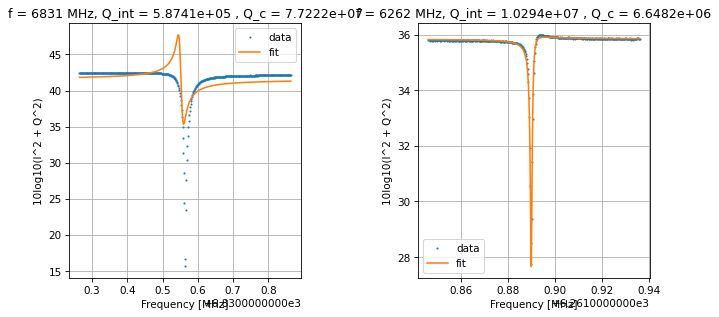

Saving data_p-30-2022-11-24-01-10-15
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device 1 Serial number: 27712
Device was found to be device 1
Set attenuation: 15.0
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device was found to be device 0
Set attenuation: 15.0
Device 1 Serial number: 27712
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Frequencies out are: [1830.5640000000003, 1261.8909999999996] MHz


  0%|          | 0/450 [00:00<?, ?it/s]

Round 0, time 7.703 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 1, time 7.796 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 2, time 7.734 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 3, time 7.800 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 4, time 7.780 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 5, time 7.828 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 6, time 7.624 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 7, time 7.755 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 8, time 7.717 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 9, time 7.808 s
Final time = 77.545 s


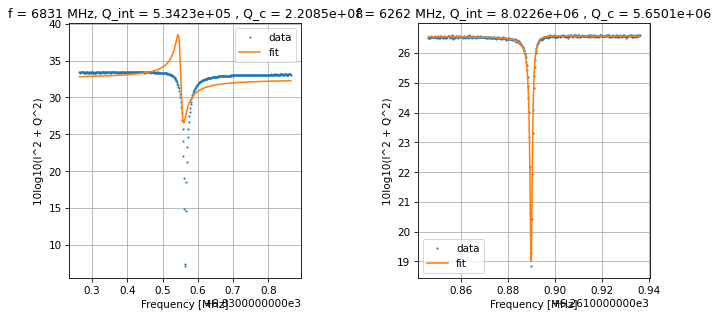

Saving data_p-40-2022-11-24-01-10-59
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device 1 Serial number: 27712
Device was found to be device 1
Set attenuation: 20.0
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device was found to be device 0
Set attenuation: 20.0
Device 1 Serial number: 27712
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Frequencies out are: [1830.5640000000003, 1261.8909999999996] MHz


  0%|          | 0/450 [00:00<?, ?it/s]

Round 0, time 7.773 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 1, time 7.730 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 2, time 7.775 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 3, time 7.817 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 4, time 7.693 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 5, time 7.793 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 6, time 7.716 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 7, time 7.764 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 8, time 7.702 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 9, time 7.765 s
Final time = 77.529 s


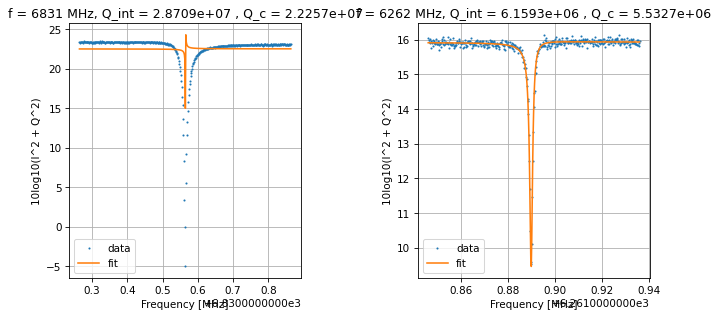

Saving data_p-50-2022-11-24-01-12-18
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device 1 Serial number: 27712
Device was found to be device 1
Set attenuation: 25.0
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device was found to be device 0
Set attenuation: 25.0
Device 1 Serial number: 27712
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Frequencies out are: [1830.5640000000003, 1261.8909999999996] MHz


  0%|          | 0/450 [00:00<?, ?it/s]

Round 0, time 7.682 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 1, time 7.356 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 2, time 7.400 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 3, time 7.777 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 4, time 7.681 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 5, time 7.697 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 6, time 7.723 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 7, time 7.835 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 8, time 7.707 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 9, time 7.765 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 10, time 7.762 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 11, time 7.804 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 12, time 7.789 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 13, time 7.783 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 14, time 7.637 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 15, time 7.739 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 16, time 7.768 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 17, time 7.716 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 18, time 7.758 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 19, time 7.619 s
Final time = 153.997 s


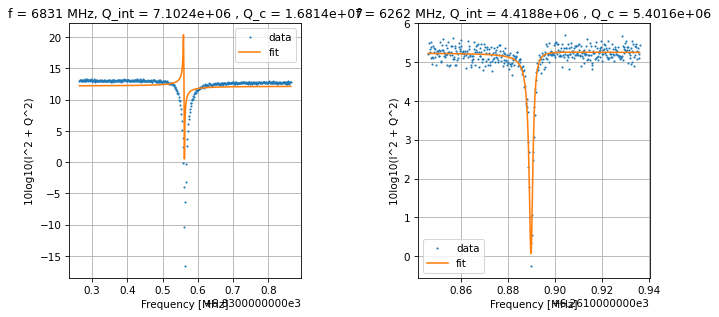

Saving data_p-60-2022-11-24-01-13-37
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device 1 Serial number: 27712
Device was found to be device 1
Set attenuation: 30.0
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device was found to be device 0
Set attenuation: 30.0
Device 1 Serial number: 27712
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Frequencies out are: [1830.5640000000003, 1261.8909999999996] MHz


  0%|          | 0/450 [00:00<?, ?it/s]

Round 0, time 7.638 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 1, time 7.800 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 2, time 7.650 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 3, time 7.760 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 4, time 7.793 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 5, time 7.768 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 6, time 7.790 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 7, time 7.744 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 8, time 7.746 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 9, time 7.722 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 10, time 7.734 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 11, time 7.762 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 12, time 7.753 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 13, time 7.759 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 14, time 7.755 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 15, time 7.698 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 16, time 7.736 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 17, time 7.717 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 18, time 7.792 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 19, time 7.658 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 20, time 7.797 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 21, time 7.722 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 22, time 7.771 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 23, time 7.638 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 24, time 7.723 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 25, time 7.691 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 26, time 7.836 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 27, time 7.625 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 28, time 7.660 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 29, time 7.757 s
Final time = 231.996 s


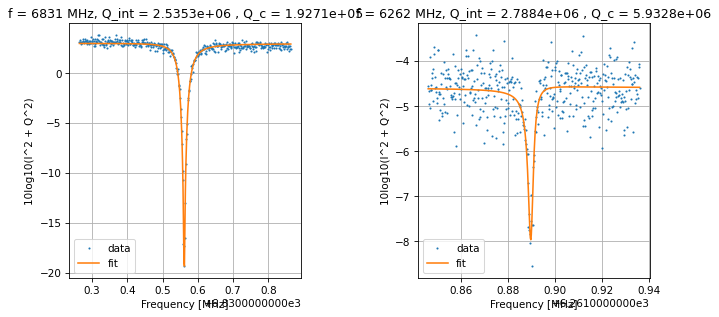

Saving data_p-70-2022-11-24-01-16-12
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device 1 Serial number: 27712
Device was found to be device 1
Set attenuation: 35.0
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device was found to be device 0
Set attenuation: 35.0
Device 1 Serial number: 27712
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Frequencies out are: [1830.5640000000003, 1261.8909999999996] MHz


  0%|          | 0/450 [00:00<?, ?it/s]

Round 0, time 10.034 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 1, time 9.955 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 2, time 10.020 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 3, time 9.958 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 4, time 10.022 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 5, time 10.001 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 6, time 10.004 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 7, time 9.995 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 8, time 10.019 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 9, time 9.983 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 10, time 10.013 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 11, time 9.928 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 12, time 9.978 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 13, time 10.001 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 14, time 10.002 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 15, time 9.949 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 16, time 10.023 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 17, time 9.987 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 18, time 10.036 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 19, time 9.996 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 20, time 9.990 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 21, time 9.989 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 22, time 9.930 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 23, time 9.927 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 24, time 10.047 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 25, time 9.961 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 26, time 9.980 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 27, time 9.959 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 28, time 9.975 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 29, time 10.044 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 30, time 10.446 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 31, time 9.897 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 32, time 10.013 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 33, time 9.985 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 34, time 10.027 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 35, time 9.979 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 36, time 9.964 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 37, time 9.994 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 38, time 9.881 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 39, time 9.961 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 40, time 9.994 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 41, time 10.005 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 42, time 10.002 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 43, time 9.996 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 44, time 9.976 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 45, time 10.035 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 46, time 10.009 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 47, time 9.965 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 48, time 9.972 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 49, time 9.911 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 50, time 9.982 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 51, time 9.964 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 52, time 9.973 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 53, time 10.031 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 54, time 10.506 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 55, time 10.098 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 56, time 9.902 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 57, time 9.973 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 58, time 9.945 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 59, time 10.011 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 60, time 9.997 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 61, time 9.987 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 62, time 10.034 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 63, time 9.963 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 64, time 9.897 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 65, time 9.951 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 66, time 9.979 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 67, time 9.968 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 68, time 9.974 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 69, time 10.012 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 70, time 9.888 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 71, time 9.997 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 72, time 10.003 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 73, time 9.888 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 74, time 9.913 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 75, time 9.983 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 76, time 9.946 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 77, time 9.996 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 78, time 10.011 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 79, time 9.988 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 80, time 10.060 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 81, time 10.006 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 82, time 10.048 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 83, time 9.930 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 84, time 9.943 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 85, time 9.923 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 86, time 9.915 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 87, time 9.998 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 88, time 9.995 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 89, time 9.963 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 90, time 10.040 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 91, time 9.918 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 92, time 10.003 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 93, time 10.011 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 94, time 9.944 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 95, time 9.979 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 96, time 9.962 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 97, time 9.970 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 98, time 9.879 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 99, time 9.935 s
Final time = 998.908 s


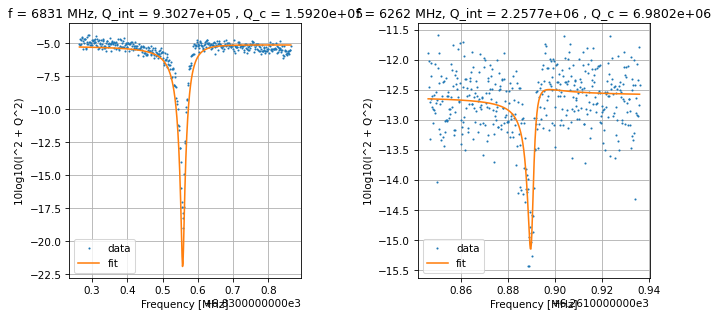

Saving data_p-80-2022-11-24-01-20-05
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device 1 Serial number: 27712
Device was found to be device 1
Set attenuation: 40.0
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Setting attenuation
2  device(s) found
Device 0 Serial number: 27784
Device was found to be device 0
Set attenuation: 40.0
Device 1 Serial number: 27712
Device 2 Serial number: 0
Device 3 Serial number: 0
Device 4 Serial number: 0
Frequencies out are: [1830.5640000000003, 1261.8909999999996] MHz


  0%|          | 0/450 [00:00<?, ?it/s]

Round 0, time 9.971 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 1, time 9.982 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 2, time 9.944 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 3, time 9.840 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 4, time 9.905 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 5, time 9.970 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 6, time 9.963 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 7, time 9.975 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 8, time 9.937 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 9, time 9.887 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 10, time 9.964 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 11, time 9.952 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 12, time 10.031 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 13, time 9.980 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 14, time 10.023 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 15, time 10.009 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 16, time 9.977 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 17, time 10.025 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 18, time 9.974 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 19, time 9.963 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 20, time 10.000 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 21, time 9.971 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 22, time 10.031 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 23, time 9.985 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 24, time 9.979 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 25, time 10.026 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 26, time 9.910 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 27, time 9.976 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 28, time 10.021 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 29, time 9.949 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 30, time 9.954 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 31, time 9.941 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 32, time 9.961 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 33, time 10.003 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 34, time 9.917 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 35, time 10.003 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 36, time 9.979 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 37, time 9.897 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 38, time 9.942 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 39, time 9.873 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 40, time 9.987 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 41, time 9.995 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 42, time 9.928 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 43, time 9.978 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 44, time 9.962 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 45, time 9.985 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 46, time 9.975 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 47, time 10.002 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 48, time 9.992 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 49, time 9.946 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 50, time 9.931 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 51, time 9.897 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 52, time 9.889 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 53, time 9.912 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 54, time 9.914 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 55, time 9.864 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 56, time 9.986 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 57, time 9.962 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 58, time 9.923 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 59, time 9.937 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 60, time 9.941 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 61, time 9.948 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 62, time 10.030 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 63, time 9.930 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 64, time 9.954 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 65, time 10.006 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 66, time 9.959 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 67, time 9.951 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 68, time 9.952 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 69, time 9.863 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 70, time 9.873 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 71, time 9.844 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 72, time 9.896 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 73, time 9.989 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 74, time 9.874 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 75, time 9.989 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 76, time 9.958 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 77, time 9.964 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 78, time 9.973 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 79, time 9.970 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 80, time 9.875 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 81, time 9.956 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 82, time 9.947 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 83, time 9.977 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 84, time 9.949 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 85, time 9.938 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 86, time 9.973 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 87, time 9.932 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 88, time 9.917 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 89, time 9.882 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 90, time 9.931 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 91, time 9.966 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 92, time 9.958 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 93, time 9.903 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 94, time 9.973 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 95, time 9.973 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 96, time 9.999 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 97, time 9.950 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 98, time 9.954 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 99, time 9.988 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 100, time 9.902 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 101, time 9.923 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 102, time 9.988 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 103, time 9.897 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 104, time 9.984 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 105, time 9.840 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 106, time 10.011 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 107, time 9.928 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 108, time 9.835 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 109, time 9.922 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 110, time 9.952 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 111, time 9.834 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 112, time 9.860 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 113, time 9.971 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 114, time 9.950 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 115, time 9.891 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 116, time 9.947 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 117, time 9.969 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 118, time 9.950 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 119, time 9.864 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 120, time 9.937 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 121, time 9.932 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 122, time 9.930 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 123, time 9.910 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 124, time 9.925 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 125, time 9.966 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 126, time 9.931 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 127, time 9.950 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 128, time 9.923 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 129, time 9.923 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 130, time 9.947 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 131, time 9.973 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 132, time 9.925 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 133, time 9.953 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 134, time 9.939 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 135, time 9.922 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 136, time 9.943 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 137, time 9.935 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 138, time 9.874 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 139, time 9.960 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 140, time 9.985 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 141, time 9.963 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 142, time 9.947 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 143, time 9.907 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 144, time 9.914 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 145, time 9.862 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 146, time 9.896 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 147, time 9.910 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 148, time 9.828 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 149, time 9.856 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 150, time 9.908 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 151, time 9.951 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 152, time 9.974 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 153, time 9.913 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 154, time 9.927 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 155, time 9.868 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 156, time 9.944 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 157, time 9.974 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 158, time 9.918 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 159, time 9.931 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 160, time 9.980 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 161, time 9.923 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 162, time 9.950 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 163, time 9.966 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 164, time 9.901 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 165, time 9.936 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 166, time 9.947 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 167, time 9.945 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 168, time 9.949 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 169, time 9.958 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 170, time 9.972 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 171, time 9.935 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 172, time 9.889 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 173, time 9.896 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 174, time 9.874 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 175, time 9.964 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 176, time 9.966 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 177, time 9.885 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 178, time 9.871 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 179, time 9.818 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 180, time 9.764 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 181, time 9.941 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 182, time 9.934 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 183, time 9.961 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 184, time 9.855 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 185, time 9.826 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 186, time 9.965 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 187, time 9.945 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 188, time 9.952 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 189, time 9.937 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 190, time 9.879 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 191, time 9.967 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 192, time 9.915 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 193, time 9.971 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 194, time 9.853 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 195, time 9.859 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 196, time 10.475 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 197, time 9.934 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 198, time 9.950 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 199, time 9.931 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 200, time 9.932 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 201, time 9.944 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 202, time 9.965 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 203, time 9.944 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 204, time 9.936 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 205, time 9.853 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 206, time 9.979 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 207, time 9.912 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 208, time 9.918 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 209, time 9.918 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 210, time 9.988 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 211, time 9.921 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 212, time 9.916 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 213, time 9.927 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 214, time 9.875 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 215, time 9.873 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 216, time 9.923 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 217, time 9.937 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 218, time 9.879 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 219, time 9.891 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 220, time 9.937 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 221, time 9.949 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 222, time 9.950 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 223, time 9.957 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 224, time 9.941 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 225, time 9.941 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 226, time 9.960 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 227, time 9.958 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 228, time 9.927 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 229, time 9.954 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 230, time 9.982 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 231, time 9.944 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 232, time 9.956 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 233, time 9.968 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 234, time 9.943 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 235, time 9.900 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 236, time 9.923 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 237, time 9.921 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 238, time 9.937 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 239, time 9.941 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 240, time 9.865 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 241, time 9.962 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 242, time 9.948 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 243, time 9.854 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 244, time 9.859 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 245, time 9.842 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 246, time 9.935 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 247, time 9.963 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 248, time 9.935 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 249, time 9.963 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 250, time 9.936 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 251, time 9.944 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 252, time 9.967 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 253, time 9.915 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 254, time 9.949 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 255, time 9.924 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 256, time 9.942 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 257, time 9.943 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 258, time 9.937 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 259, time 9.911 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 260, time 9.946 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 261, time 9.938 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 262, time 9.957 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 263, time 9.945 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 264, time 9.901 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 265, time 9.933 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 266, time 9.905 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 267, time 9.952 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 268, time 9.954 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 269, time 9.935 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 270, time 9.898 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 271, time 9.930 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 272, time 9.949 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 273, time 9.961 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 274, time 9.910 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 275, time 9.864 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 276, time 9.986 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 277, time 9.911 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 278, time 9.903 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 279, time 9.925 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 280, time 9.928 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 281, time 9.962 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 282, time 9.965 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 283, time 9.936 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 284, time 9.963 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 285, time 9.941 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 286, time 9.865 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 287, time 9.921 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 288, time 9.972 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 289, time 9.921 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 290, time 9.900 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 291, time 9.948 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 292, time 9.921 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 293, time 9.937 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 294, time 9.951 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 295, time 9.922 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 296, time 10.039 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 297, time 9.941 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 298, time 9.920 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 299, time 9.928 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 300, time 9.921 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 301, time 9.857 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 302, time 9.966 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 303, time 9.889 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 304, time 9.881 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 305, time 9.980 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 306, time 9.917 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 307, time 9.934 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 308, time 9.941 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 309, time 9.941 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 310, time 9.971 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 311, time 9.917 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 312, time 9.987 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 313, time 9.959 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 314, time 9.923 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 315, time 9.929 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 316, time 9.922 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 317, time 9.928 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 318, time 9.935 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 319, time 9.899 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 320, time 9.949 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 321, time 9.922 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 322, time 9.971 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 323, time 9.968 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 324, time 9.925 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 325, time 9.970 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 326, time 9.916 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 327, time 9.926 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 328, time 9.968 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 329, time 9.906 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 330, time 9.937 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 331, time 9.988 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 332, time 9.927 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 333, time 9.912 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 334, time 9.900 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 335, time 9.941 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 336, time 9.932 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 337, time 9.984 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 338, time 9.898 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 339, time 9.924 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 340, time 9.942 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 341, time 9.989 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 342, time 9.960 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 343, time 9.944 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 344, time 9.997 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 345, time 9.930 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 346, time 9.926 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 347, time 9.946 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 348, time 9.868 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 349, time 9.908 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 350, time 9.891 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 351, time 9.906 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 352, time 9.944 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 353, time 9.832 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 354, time 9.873 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 355, time 9.923 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 356, time 9.846 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 357, time 9.850 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 358, time 9.930 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 359, time 9.953 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 360, time 9.943 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 361, time 9.852 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 362, time 9.936 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 363, time 9.908 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 364, time 9.919 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 365, time 10.001 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 366, time 9.951 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 367, time 9.952 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 368, time 9.948 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 369, time 9.976 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 370, time 9.926 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 371, time 9.908 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 372, time 9.829 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 373, time 9.855 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 374, time 9.812 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 375, time 9.876 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 376, time 9.906 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 377, time 9.859 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 378, time 9.885 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 379, time 9.865 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 380, time 9.836 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 381, time 9.949 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 382, time 9.922 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 383, time 9.943 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 384, time 9.943 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 385, time 9.941 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 386, time 9.992 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 387, time 9.902 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 388, time 9.962 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 389, time 9.911 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 390, time 9.813 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 391, time 9.886 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 392, time 9.820 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 393, time 9.922 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 394, time 10.000 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 395, time 9.981 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 396, time 9.963 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 397, time 9.970 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 398, time 9.945 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 399, time 9.932 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 400, time 9.933 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 401, time 9.845 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 402, time 9.903 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 403, time 9.957 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 404, time 9.904 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 405, time 9.958 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 406, time 9.954 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 407, time 9.910 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 408, time 9.946 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 409, time 9.895 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 410, time 9.860 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 411, time 9.895 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 412, time 9.898 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 413, time 9.945 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 414, time 9.896 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 415, time 9.977 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 416, time 9.933 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 417, time 9.838 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 418, time 9.924 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 419, time 9.910 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 420, time 9.994 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 421, time 9.909 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 422, time 9.907 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 423, time 9.965 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 424, time 9.904 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 425, time 9.946 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 426, time 9.925 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 427, time 9.928 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 428, time 9.946 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 429, time 9.905 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 430, time 9.939 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 431, time 9.947 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 432, time 9.936 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 433, time 9.949 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 434, time 9.929 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 435, time 9.936 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 436, time 9.963 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 437, time 9.938 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 438, time 9.909 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 439, time 9.946 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 440, time 9.863 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 441, time 9.874 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 442, time 9.927 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 443, time 9.921 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 444, time 9.983 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 445, time 9.893 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 446, time 9.799 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 447, time 9.821 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 448, time 9.915 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 449, time 9.940 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 450, time 9.873 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 451, time 9.890 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 452, time 9.960 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 453, time 9.914 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 454, time 9.868 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 455, time 9.902 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 456, time 9.904 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 457, time 9.912 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 458, time 9.845 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 459, time 9.851 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 460, time 9.899 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 461, time 9.929 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 462, time 9.899 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 463, time 9.882 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 464, time 9.940 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 465, time 9.915 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 466, time 9.891 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 467, time 9.896 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 468, time 9.941 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 469, time 9.929 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 470, time 9.939 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 471, time 9.923 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 472, time 9.939 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 473, time 9.927 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 474, time 9.939 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 475, time 9.935 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 476, time 9.964 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 477, time 9.867 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 478, time 9.889 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 479, time 9.898 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 480, time 9.861 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 481, time 9.938 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 482, time 9.851 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 483, time 9.880 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 484, time 9.911 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 485, time 9.939 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 486, time 9.972 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 487, time 9.909 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 488, time 9.895 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 489, time 9.901 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 490, time 9.928 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 491, time 9.931 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 492, time 9.914 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 493, time 9.893 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 494, time 9.943 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 495, time 9.934 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 496, time 10.560 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 497, time 9.949 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 498, time 9.847 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 499, time 9.967 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 500, time 9.865 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 501, time 9.842 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 502, time 9.922 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 503, time 9.895 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 504, time 9.914 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 505, time 9.925 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 506, time 9.936 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 507, time 9.914 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 508, time 9.887 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 509, time 9.816 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 510, time 9.820 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 511, time 9.893 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 512, time 9.882 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 513, time 9.876 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 514, time 9.890 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 515, time 9.887 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 516, time 9.918 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 517, time 9.859 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 518, time 9.933 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 519, time 9.908 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 520, time 9.954 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 521, time 9.931 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 522, time 9.859 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 523, time 9.932 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 524, time 9.958 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 525, time 9.926 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 526, time 9.861 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 527, time 9.829 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 528, time 9.874 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 529, time 9.930 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 530, time 9.944 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 531, time 9.917 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 532, time 9.903 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 533, time 9.964 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 534, time 9.891 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 535, time 9.907 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 536, time 9.951 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 537, time 9.917 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 538, time 9.931 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 539, time 9.947 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 540, time 9.853 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 541, time 9.858 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 542, time 9.901 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 543, time 9.848 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 544, time 9.938 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 545, time 9.914 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 546, time 9.862 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 547, time 9.865 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 548, time 9.804 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 549, time 9.856 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 550, time 9.833 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 551, time 9.862 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 552, time 9.962 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 553, time 9.874 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 554, time 9.844 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 555, time 9.818 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 556, time 9.920 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 557, time 10.010 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 558, time 9.876 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 559, time 9.941 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 560, time 9.958 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 561, time 9.920 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 562, time 9.930 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 563, time 9.940 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 564, time 9.889 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 565, time 9.948 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 566, time 9.857 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 567, time 9.787 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 568, time 9.798 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 569, time 9.908 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 570, time 9.947 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 571, time 9.936 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 572, time 9.882 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 573, time 9.878 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 574, time 9.941 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 575, time 9.954 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 576, time 9.889 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 577, time 9.892 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 578, time 9.866 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 579, time 9.919 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 580, time 9.875 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 581, time 9.948 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 582, time 9.959 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 583, time 9.986 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 584, time 9.857 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 585, time 9.934 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 586, time 9.930 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 587, time 9.925 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 588, time 9.879 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 589, time 9.935 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 590, time 9.973 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 591, time 9.900 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 592, time 9.997 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 593, time 9.906 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 594, time 9.935 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 595, time 9.852 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 596, time 9.947 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 597, time 9.931 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 598, time 9.932 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 599, time 9.902 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 600, time 9.937 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 601, time 9.897 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 602, time 9.769 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 603, time 9.847 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 604, time 9.888 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 605, time 9.888 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 606, time 9.867 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 607, time 9.897 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 608, time 9.852 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 609, time 9.814 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 610, time 9.859 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 611, time 9.829 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 612, time 9.894 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 613, time 9.869 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 614, time 9.858 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 615, time 9.875 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 616, time 9.868 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 617, time 9.911 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 618, time 9.874 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 619, time 9.847 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 620, time 9.759 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 621, time 9.641 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 622, time 9.664 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 623, time 9.672 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 624, time 9.793 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 625, time 9.818 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 626, time 9.796 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 627, time 9.825 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 628, time 10.028 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 629, time 9.899 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 630, time 9.856 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 631, time 9.869 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 632, time 9.809 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 633, time 9.832 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 634, time 9.899 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 635, time 9.888 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 636, time 9.915 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 637, time 9.801 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 638, time 9.791 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 639, time 9.801 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 640, time 9.918 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 641, time 9.911 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 642, time 9.862 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 643, time 9.799 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 644, time 9.828 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 645, time 9.905 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 646, time 9.905 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 647, time 9.857 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 648, time 9.894 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 649, time 9.837 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 650, time 9.895 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 651, time 9.891 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 652, time 9.896 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 653, time 9.812 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 654, time 9.882 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 655, time 9.782 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 656, time 9.786 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 657, time 9.843 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 658, time 9.876 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 659, time 9.954 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 660, time 9.843 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 661, time 9.885 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 662, time 9.860 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 663, time 9.886 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 664, time 9.903 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 665, time 9.752 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 666, time 9.815 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 667, time 9.906 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 668, time 9.814 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 669, time 9.881 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 670, time 9.862 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 671, time 9.950 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 672, time 9.912 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 673, time 9.795 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 674, time 9.854 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 675, time 9.914 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 676, time 9.910 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 677, time 9.855 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 678, time 9.828 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 679, time 9.830 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 680, time 9.872 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 681, time 9.893 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 682, time 9.871 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 683, time 9.857 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 684, time 9.848 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 685, time 9.904 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 686, time 9.887 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 687, time 9.838 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 688, time 9.868 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 689, time 9.765 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 690, time 9.842 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 691, time 9.900 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 692, time 9.828 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 693, time 9.824 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 694, time 9.798 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 695, time 9.762 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 696, time 9.761 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 697, time 9.829 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 698, time 9.814 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 699, time 9.723 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 700, time 9.796 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 701, time 9.885 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 702, time 9.826 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 703, time 9.875 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 704, time 9.835 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 705, time 9.874 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 706, time 9.863 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 707, time 9.859 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 708, time 9.876 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 709, time 9.781 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 710, time 9.897 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 711, time 9.840 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 712, time 9.864 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 713, time 9.888 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 714, time 9.889 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 715, time 9.833 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 716, time 9.868 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 717, time 9.905 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 718, time 9.820 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 719, time 9.833 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 720, time 9.828 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 721, time 9.870 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 722, time 9.853 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 723, time 9.850 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 724, time 9.905 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 725, time 9.847 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 726, time 9.783 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 727, time 9.822 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 728, time 9.815 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 729, time 9.879 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 730, time 9.862 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 731, time 9.889 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 732, time 9.803 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 733, time 9.886 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 734, time 9.886 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 735, time 9.836 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 736, time 9.874 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 737, time 9.856 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 738, time 9.830 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 739, time 9.790 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 740, time 9.798 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 741, time 9.768 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 742, time 9.795 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 743, time 9.781 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 744, time 9.782 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 745, time 9.798 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 746, time 9.811 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 747, time 9.862 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 748, time 9.769 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 749, time 9.872 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 750, time 9.812 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 751, time 9.817 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 752, time 9.804 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 753, time 9.857 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 754, time 9.767 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 755, time 9.851 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 756, time 9.847 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 757, time 9.862 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 758, time 9.877 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 759, time 9.871 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 760, time 9.810 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 761, time 9.845 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 762, time 9.900 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 763, time 9.870 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 764, time 9.767 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 765, time 9.863 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 766, time 9.799 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 767, time 9.781 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 768, time 9.797 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 769, time 9.856 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 770, time 9.817 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 771, time 9.870 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 772, time 9.853 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 773, time 9.825 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 774, time 9.838 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 775, time 9.832 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 776, time 9.888 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 777, time 9.849 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 778, time 9.886 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 779, time 9.877 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 780, time 9.851 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 781, time 9.765 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 782, time 9.858 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 783, time 9.773 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 784, time 9.819 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 785, time 9.778 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 786, time 9.819 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 787, time 9.780 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 788, time 9.844 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 789, time 9.874 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 790, time 9.790 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 791, time 9.846 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 792, time 9.833 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 793, time 9.792 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 794, time 9.799 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 795, time 9.756 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 796, time 9.791 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 797, time 9.766 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 798, time 9.842 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 799, time 9.873 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 800, time 9.783 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 801, time 9.930 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 802, time 9.744 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 803, time 9.734 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 804, time 9.746 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 805, time 9.733 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 806, time 9.768 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 807, time 9.836 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 808, time 9.771 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 809, time 9.745 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 810, time 9.752 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 811, time 9.821 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 812, time 9.843 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 813, time 9.818 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 814, time 9.801 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 815, time 9.812 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 816, time 10.446 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 817, time 9.878 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 818, time 9.745 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 819, time 9.720 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 820, time 9.731 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 821, time 9.680 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 822, time 9.757 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 823, time 9.839 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 824, time 9.814 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 825, time 9.853 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 826, time 9.824 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 827, time 9.787 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 828, time 9.812 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 829, time 9.872 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 830, time 9.783 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 831, time 9.747 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 832, time 9.713 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 833, time 9.838 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 834, time 9.830 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 835, time 9.842 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 836, time 9.840 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 837, time 9.805 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 838, time 9.748 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 839, time 9.702 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 840, time 9.810 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 841, time 9.842 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 842, time 9.775 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 843, time 9.741 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 844, time 9.792 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 845, time 9.840 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 846, time 9.861 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 847, time 9.836 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 848, time 9.801 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 849, time 9.828 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 850, time 9.825 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 851, time 9.760 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 852, time 9.815 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 853, time 9.810 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 854, time 9.767 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 855, time 9.816 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 856, time 9.709 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 857, time 9.707 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 858, time 9.709 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 859, time 9.814 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 860, time 9.787 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 861, time 9.768 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 862, time 9.721 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 863, time 9.803 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 864, time 9.763 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 865, time 9.730 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 866, time 9.866 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 867, time 9.819 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 868, time 9.848 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 869, time 9.790 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 870, time 9.909 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 871, time 9.786 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 872, time 9.741 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 873, time 9.767 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 874, time 9.772 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 875, time 9.829 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 876, time 9.785 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 877, time 9.821 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 878, time 9.791 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 879, time 9.814 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 880, time 9.813 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 881, time 9.815 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 882, time 9.827 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 883, time 9.830 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 884, time 9.741 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 885, time 9.788 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 886, time 9.806 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 887, time 9.838 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 888, time 9.833 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 889, time 9.799 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 890, time 9.801 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 891, time 9.811 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 892, time 9.805 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 893, time 9.730 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 894, time 9.716 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 895, time 9.756 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 896, time 9.737 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 897, time 9.809 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 898, time 9.854 s


  0%|          | 0/450 [00:00<?, ?it/s]

Round 899, time 9.787 s
Final time = 8904.603 s


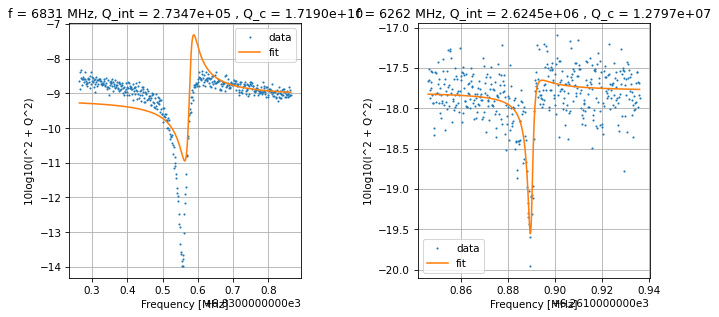

Saving data_p-90-2022-11-24-01-36-45


In [12]:
time.sleep(3*60*60)

# Acquire
for i, atten in enumerate(inputDict['attenList']):
    # update per power parameters
    inputDict['power'] = inputDict['basePower']-atten
    inputDict['n_rounds'] = inputDict['n_roundsList'][i]
    inputDict['n_reps'] = inputDict['n_repsList'][i]
    inputDict['readout_length'] = inputDict['readout_lengthList'][i]

    # set attenuation. Split it evenly across all attenuators
    # NOTE: What happens if we average to somewhere between the resolution of the attenuators? Possible issue
    for serial in inputDict['attenSerial']:
        setatten(atten/len(inputDict['attenSerial']), serial, printv=True)

    # run a frequency sweep
    Instance = mResSweepDouble.ResSweep(path=savePath, prefix='data_p'+str(inputDict['power']), inputDict=inputDict, soc=soc, soccfg=soccfg, 
                                  temperatureLogPath='Z:\Alex\other\LogFiles')
    data = mResSweepDouble.ResSweep.acquire(Instance)
    mResSweepDouble.ResSweep.display(Instance, data)
    mResSweepDouble.ResSweep.save_data(Instance, data)